In [219]:
# Import library for downloading dataset
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import keras.callbacks

In [220]:
# Download the EMNIST dataset
(train_ds, test_ds), info = tfds.load('emnist', split=['train', 'test'], with_info=True, shuffle_files=True, as_supervised=True)
assert isinstance(train_ds, tf.data.Dataset)
assert isinstance(test_ds, tf.data.Dataset)
assert isinstance(info, tfds.core.DatasetInfo)

In [221]:
ds = train_ds.take(1)
for image, label in ds:
    print(image.shape, label)

(28, 28, 1) tf.Tensor(1, shape=(), dtype=int64)


In [222]:
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    image=tf.image.flip_left_right(image)
    image = tf.image.rot90(image)
    return tf.cast(image, tf.float32) / 255., label

train_ds = train_ds.map(normalize_img)
test_ds = test_ds.map(normalize_img)


In [223]:
train_ds = train_ds.batch(512)
test_ds = test_ds.batch(512)

In [224]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(dtype=tf.float32, shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2, 2), padding="same"))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2, 2), padding="same"))
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D((2, 2), padding="same"))
model.add(tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(62, activation='softmax'))
model.summary()

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_120 (Conv2D)             │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_85 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_121 (Conv2D)             │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_86 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_122 (Conv2D)             │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_87 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_123 (Conv2D)             │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 62)             │         4,030 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 451,454 (1.72 MB)

 Trainable params: 450,494 (1.72 MB)

 Non-trainable params: 960 (3.75 KB)

In [225]:

reduce_lr = keras.callbacks.ReduceLROnPlateau(patience=10, min_delta=0.01, factor=0.03)
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )
history = model.fit(train_ds, validation_data=test_ds, epochs=50, callbacks=[reduce_lr, early_stop], verbose=True)

Epoch 1/50
1364/1364 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.7317 - loss: 0.9531 - val_accuracy: 0.8535 - val_loss: 0.4021 - learning_rate: 0.0010
Epoch 2/50
1364/1364 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8566 - loss: 0.4073 - val_accuracy: 0.8650 - val_loss: 0.3682 - learning_rate: 0.0010
Epoch 3/50
1364/1364 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8637 - loss: 0.3792 - val_accuracy: 0.8664 - val_loss: 0.3598 - learning_rate: 0.0010
Epoch 4/50
1364/1364 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8686 - loss: 0.3628 - val_accuracy: 0.8673 - val_loss: 0.3611 - learning_rate: 0.0010
Epoch 5/50
1364/1364 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8715 - loss: 0.3510 - val_accuracy: 0.8672 - val_loss: 0.3612 - learning_rate: 0.0010
Epoch 6/50
1364/1364 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8738 - loss: 0.3422 - val_accuracy: 0.8681 - val_loss: 0.3562 - learning_rate: 0.0010
Epoch 7/50
1364/1364 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accura

In [306]:
from PIL import Image
img = Image.open("/content/j.jpeg").convert('L').resize((28, 28))
img = np.array(img).astype(np.float32)
img = (img / 255.0)
img = 1 - img

In [307]:
pred = model(img.reshape(1, 28, 28, 1)) * 100

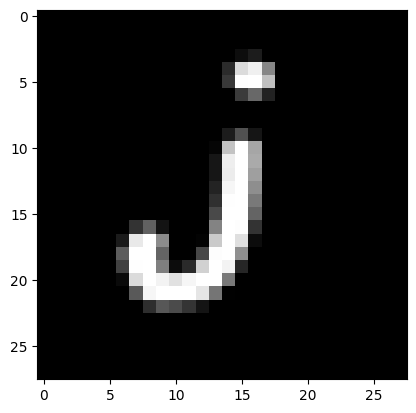

In [308]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap="gray")

In [309]:
emnist_uppercase_letters_mapping = {
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E',
    15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J',
    20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O',
    25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T',
    30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'
}
emnist_lowercase_letters_mapping = {
    36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g',
    43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n',
    50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u',
    57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'
}
emnist_digits_mapping = {i: str(i) for i in range(10)}

In [310]:
pred_index = np.argmax(pred)
if pred_index > 35:
  print(emnist_lowercase_letters_mapping[pred_index])
elif pred_index > 9:
  print(emnist_uppercase_letters_mapping[pred_index])
else:
  print(emnist_digits_mapping[pred_index])

j


In [311]:
model.save("emnist_cnn.keras")